In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as sd
%matplotlib notebook

ImportError: No module named 'xray_vision'

/Users/yoon82/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


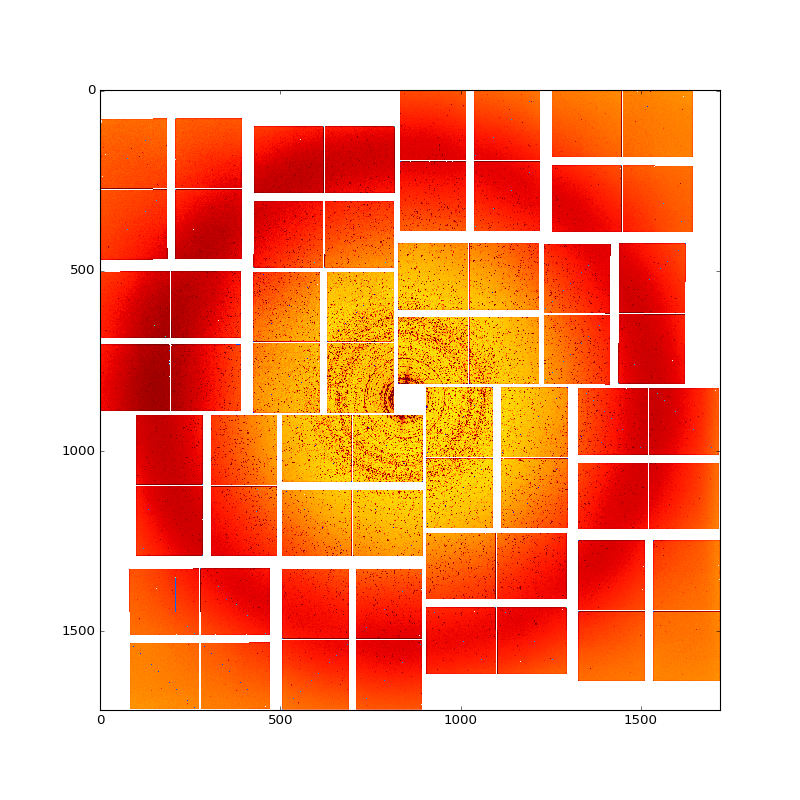

In [17]:
# Apply log to image
assembledImg = np.log(np.load('assembledImage.npy'))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(assembledImg,interpolation='none',vmax=4.5)

In [4]:
# Return two equal sized upper and lower images
# If axis is None,  halve along the first axis
def getTwoHalves(I,centre,axis=None):
    if axis is None or axis == 0:
        A = I[:centre,:]
        B = np.flipud(I[centre:,:])

        (numRowUpper,numColUpper) = A.shape
        (numRowLower,numColLower) = B.shape
        if numRowUpper >= numRowLower:
            numRow = numRowLower
            A = A[-numRow:,:]
        else:
            numRow = numRowUpper
            B = B[-numRow:,:]
    else:
        A = I[:,:centre]
        B = np.fliplr(I[:,centre:])

        (numRowLeft,numColLeft) = A.shape
        (numRowRight,numColRight) = B.shape
        if numColLeft >= numColRight:
            numCol = numColRight
            A = A[:,-numCol:]
        else:
            numCol = numColLeft
            B = B[:,-numCol:]       
    return A, B

def getScore(A,B):
    ind = (A>0)  & (B>0)
    dist = sd.euclidean(A[ind].ravel(),B[ind].ravel())
    numPix = len(ind[np.where(ind==True)])
    return dist/numPix

In [5]:
searchArray = np.arange(1,assembledImg.shape[1])
score = np.zeros(searchArray.shape)
for i, centreRow in enumerate(searchArray):
    upperImg,lowerImg = getTwoHalves(assembledImg,centreRow,axis=1)
    score[i] = getScore(upperImg,lowerImg)
centre = searchArray[np.argmin(score)]

<IPython.core.display.Javascript object>


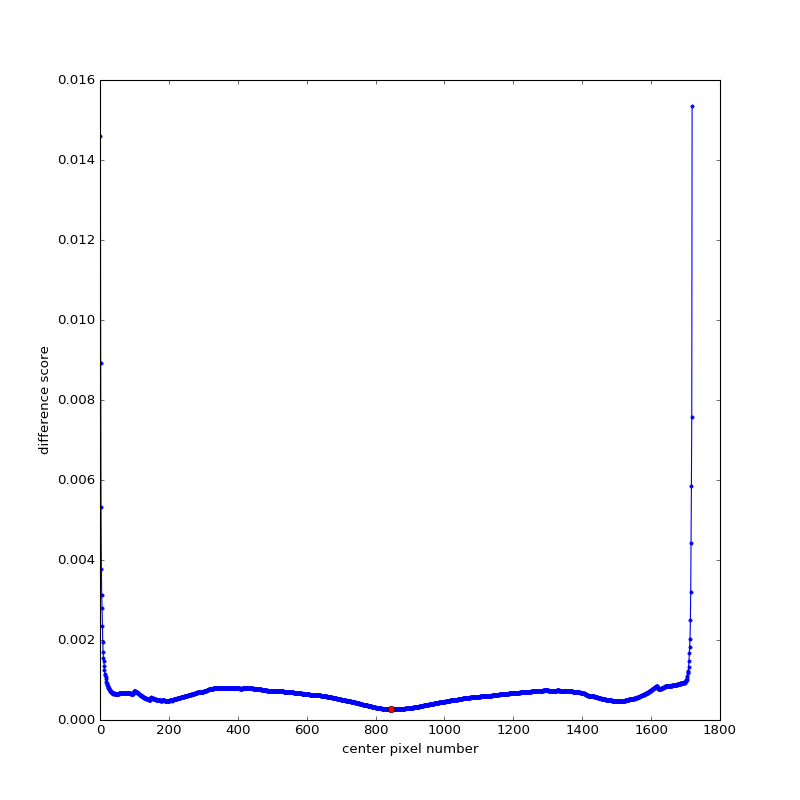

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(searchArray,score,'.-')
ax.plot(centre,score[np.argmin(score)],'ro')
plt.xlabel('center pixel number')
plt.ylabel('difference score')

<IPython.core.display.Javascript object>


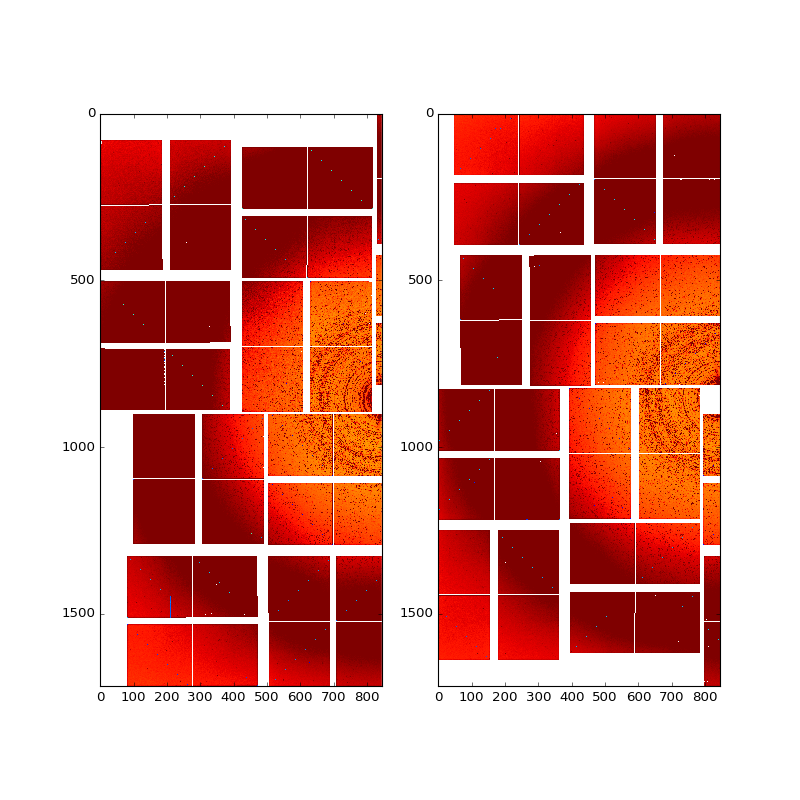

In [22]:
A,B = getTwoHalves(assembledImg,centre,axis=1)

fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.imshow(A,interpolation='none',vmax=4)
plt.subplot(122)
plt.imshow(B,interpolation='none',vmax=4)